## Loading libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay

## Loading the dataset

In [3]:
df = pd.read_csv('data_banknote_authentication.csv')

In [4]:
df

variance of Wavelet Transformed image   
0                                   3.62160  \
1                                   4.54590   
2                                   3.86600   
3                                   3.45660   
4                                   0.32924   
...                                     ...   
1367                                0.40614   
1368                               -1.38870   
1369                               -3.75030   
1370                               -3.56370   
1371                               -2.54190   

      skewness of Wavelet Transformed image   
0                                   8.66610  \
1                                   8.16740   
2                                  -2.63830   
3                                   9.52280   
4                                  -4.45520   
...                                     ...   
1367                                1.34920   
1368                               -4.87730   
1369                              -13.45860   
1370                               -8.38270   
1371                               -0.65804   

      curtosis of Wavelet Transformed image  entropy of image  class  
0                                   -2.8073          -0.44699      0  
1                                   -2.4586          -1.46210      0  
2                                    1.9242           0.10645      0  
3                                   -4.0112          -3.59440      0  
4                                    4.5718          -0.98880      0  
...                                     ...               ...    ...  
1367                                -1.4501          -0.55949      1  
1368                                 6.4774           0.34179      1  
1369                                17.5932          -2.77710      1  
1370                                12.3930          -1.28230      1  
1371                                 2.6842           1.19520      1  

[1372 rows x 5 columns]

## Performing exploratory analysis & data visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   variance of Wavelet Transformed image  1372 non-null   float64
 1   skewness of Wavelet Transformed image  1372 non-null   float64
 2   curtosis of Wavelet Transformed image  1372 non-null   float64
 3   entropy of image                       1372 non-null   float64
 4   class                                  1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
df.isnull().sum()

variance of Wavelet Transformed image    0
skewness of Wavelet Transformed image    0
curtosis of Wavelet Transformed image    0
entropy of image                         0
class                                    0
dtype: int64

In [7]:
classes = np.unique(df['class'])
classes

array([0, 1])

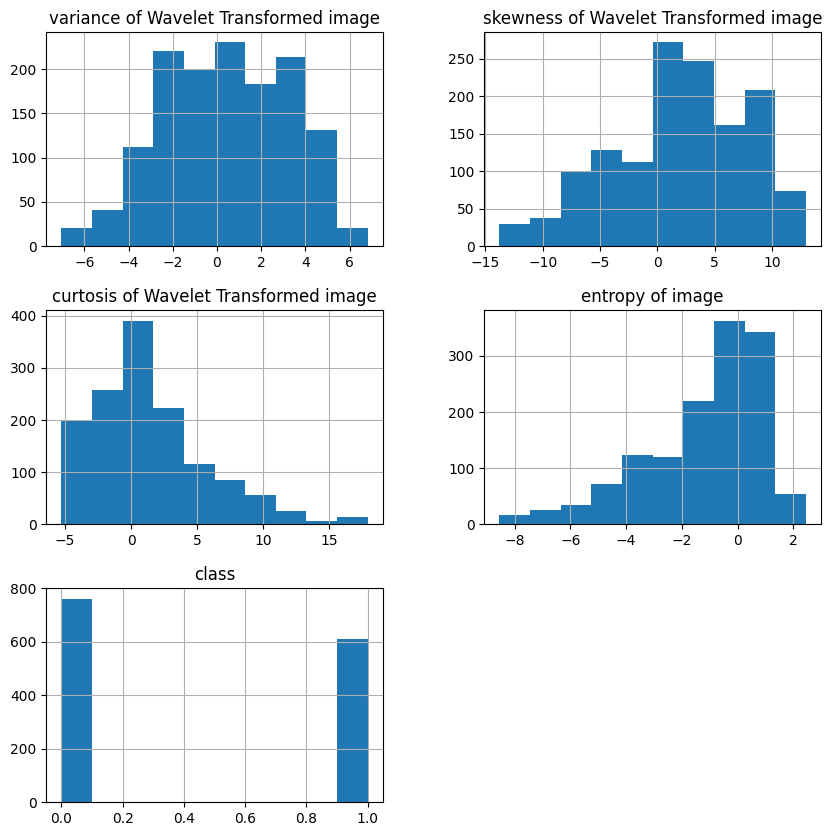

In [8]:
df.hist(figsize=(10,10))
plt.show()

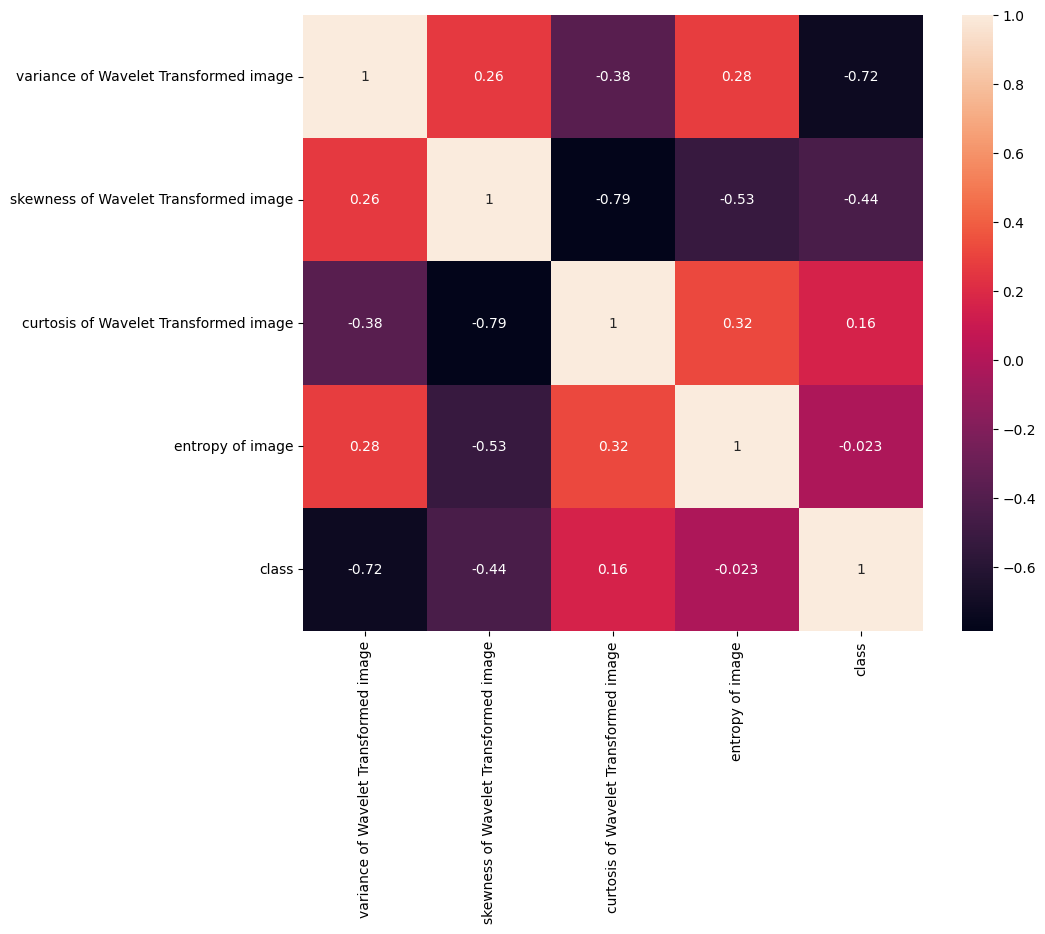

In [9]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [10]:
decision_boundary_features = ['variance of Wavelet Transformed image','skewness of Wavelet Transformed image']

## Dataset preprocessing

In [11]:
features = df.columns.tolist()[:-1]
features

['variance of Wavelet Transformed image',
 'skewness of Wavelet Transformed image',
 'curtosis of Wavelet Transformed image',
 'entropy of image']

In [12]:
X = df[features].copy()
y = df['class'].copy()

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.columns = features

In [14]:
X

variance of Wavelet Transformed image   
0                                  1.121806  \
1                                  1.447066   
2                                  1.207810   
3                                  1.063742   
4                                 -0.036772   
...                                     ...   
1367                              -0.009711   
1368                              -0.641313   
1369                              -1.472357   
1370                              -1.406693   
1371                              -1.047122   

      skewness of Wavelet Transformed image   
0                                  1.149455  \
1                                  1.064453   
2                                 -0.777352   
3                                  1.295478   
4                                 -1.087038   
...                                     ...   
1367                              -0.097693   
1368                              -1.158984   
1369                              -2.621646   
1370                              -1.756471   
1371                              -0.439822   

      curtosis of Wavelet Transformed image  entropy of image  
0                                 -0.975970          0.354561  
1                                 -0.895036         -0.128767  
2                                  0.122218          0.618073  
3                                 -1.255397         -1.144029  
4                                  0.736730          0.096587  
...                                     ...               ...  
1367                              -0.660962          0.300996  
1368                               1.179023          0.730127  
1369                               3.759017         -0.754884  
1370                               2.552043         -0.043158  
1371                               0.298616          1.136464  

[1372 rows x 4 columns]

In [15]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

## Performing train-test-validation split

In [16]:
train_X, val_test_X, train_y, val_test_y = train_test_split(X, y, test_size=0.3, random_state=0)
test_X, val_X, test_y, val_y = train_test_split(val_test_X, val_test_y, test_size=0.33, random_state=0)

## Training models and plotting decision boundaries

In [17]:
def svm_classifier(X, y, train_X, train_y, test_X, test_y, decision_boundary_features,
                       C=1.0, kernel='rbf', plot=False):
    model = SVC(C=C, kernel=kernel)
    model.fit(train_X, train_y)
    score = model.score(test_X, test_y)
    print(f'test accuracy of SVM (C={C}, kernel={kernel}): {score}')
    
    if plot:
        model = SVC(C=C, kernel=kernel)
        model.fit(X[decision_boundary_features], y)
        h = 0.02

        xf1 = X[decision_boundary_features[0]].to_numpy()
        xf2 = X[decision_boundary_features[1]].to_numpy()
        Y = np.array(y)

        x_min, x_max = xf1.min() - 10*h, xf1.max() + 10*h
        y_min, y_max = xf2.min() - 10*h, xf2.max() + 10*h
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        fig = plt.figure(figsize=(5,5))
        
        color_scheme = 'winter'
        
        plt.contourf(xx, yy, Z, cmap=color_scheme, alpha=0.25)
        plt.contour(xx, yy, Z, cmap=color_scheme, linewidths=0.7)

        plt.scatter(xf1, xf2, c=Y, cmap=color_scheme)
        plt.xlabel(decision_boundary_features[0])
        plt.ylabel(decision_boundary_features[1])
        plt.title(f'decision boundary for SVM (C={C}, kernel={kernel})')
        plt.show()


In [18]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [0.01, 0.1, 0.5, 1, 2.5, 5, 10, 25, 50, 100]

In [19]:
for kernel in kernels:
    for C in Cs:
        svm_classifier(X, y, train_X, train_y, test_X, test_y, decision_boundary_features, C=C, kernel=kernel)
    print()

test accuracy of SVM (C=0.01, kernel=linear): 0.9710144927536232
test accuracy of SVM (C=0.1, kernel=linear): 0.9818840579710145
test accuracy of SVM (C=0.5, kernel=linear): 0.9855072463768116
test accuracy of SVM (C=1, kernel=linear): 0.9855072463768116
test accuracy of SVM (C=2.5, kernel=linear): 0.9855072463768116
test accuracy of SVM (C=5, kernel=linear): 0.9891304347826086
test accuracy of SVM (C=10, kernel=linear): 0.9891304347826086
test accuracy of SVM (C=25, kernel=linear): 0.9891304347826086
test accuracy of SVM (C=50, kernel=linear): 0.9855072463768116
test accuracy of SVM (C=100, kernel=linear): 0.9855072463768116

test accuracy of SVM (C=0.01, kernel=poly): 0.7246376811594203
test accuracy of SVM (C=0.1, kernel=poly): 0.9384057971014492
test accuracy of SVM (C=0.5, kernel=poly): 0.9818840579710145
test accuracy of SVM (C=1, kernel=poly): 0.9746376811594203
test accuracy of SVM (C=2.5, kernel=poly): 0.9782608695652174
test accuracy of SVM (C=5, kernel=poly): 0.9891304347826

test accuracy of SVM (C=0.01, kernel=linear): 0.9710144927536232


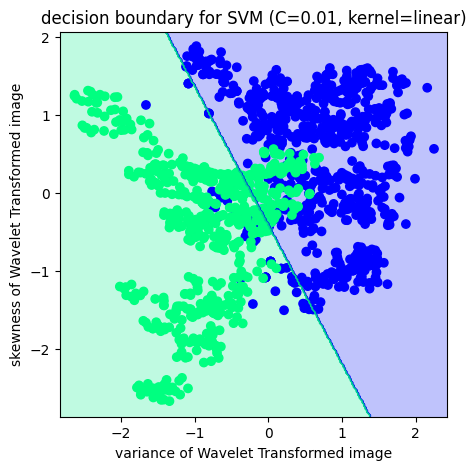

test accuracy of SVM (C=0.1, kernel=linear): 0.9818840579710145


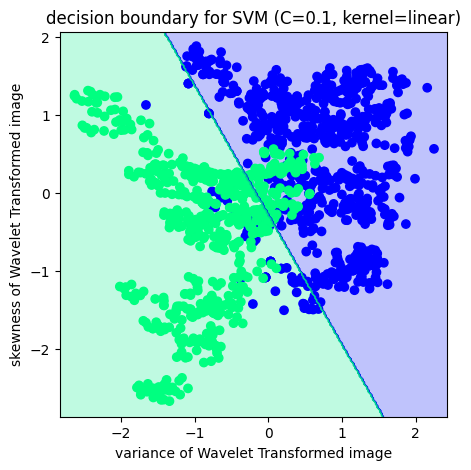

test accuracy of SVM (C=0.5, kernel=linear): 0.9855072463768116


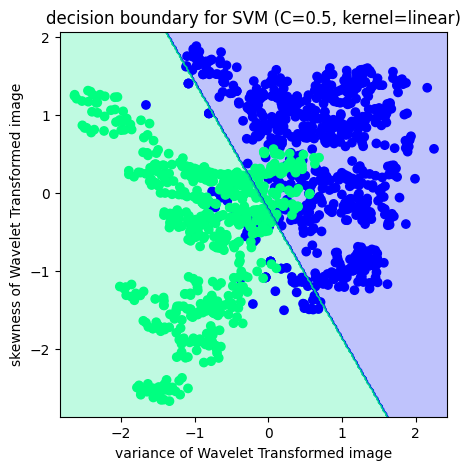

test accuracy of SVM (C=1, kernel=linear): 0.9855072463768116


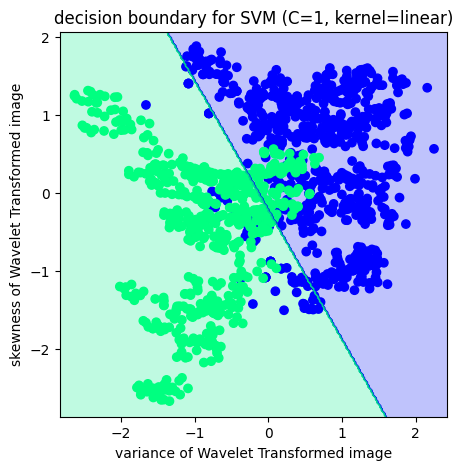

test accuracy of SVM (C=2.5, kernel=linear): 0.9855072463768116


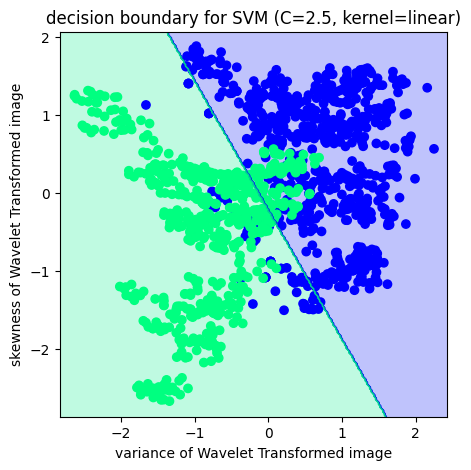

test accuracy of SVM (C=5, kernel=linear): 0.9891304347826086


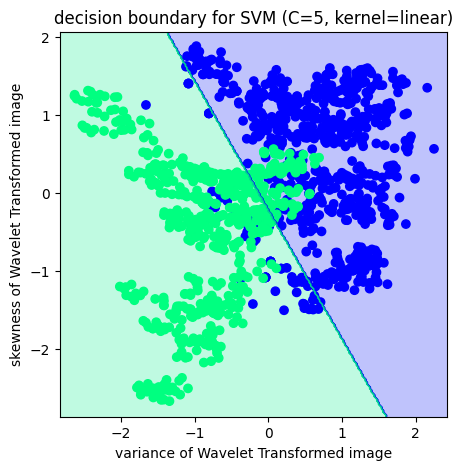

test accuracy of SVM (C=10, kernel=linear): 0.9891304347826086


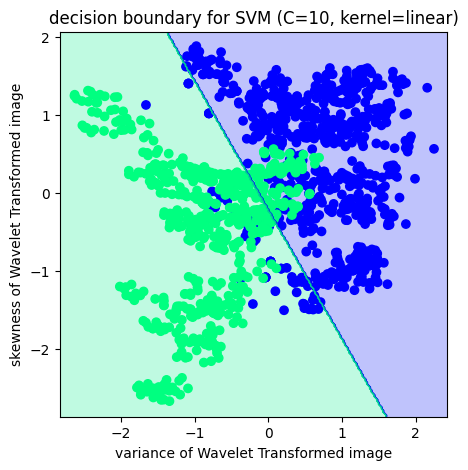

test accuracy of SVM (C=25, kernel=linear): 0.9891304347826086


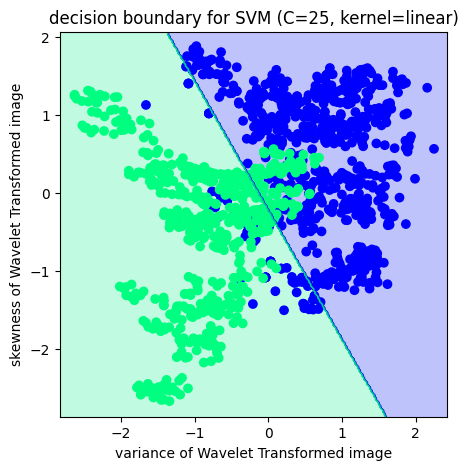

test accuracy of SVM (C=50, kernel=linear): 0.9855072463768116


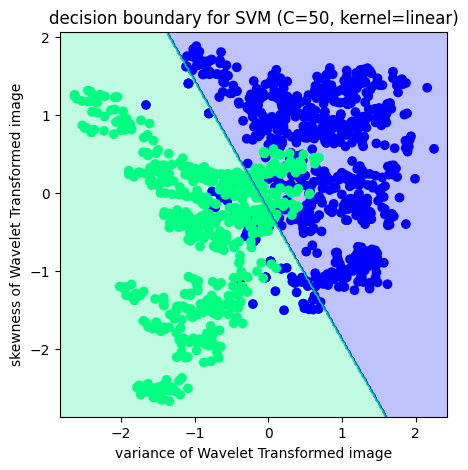

test accuracy of SVM (C=100, kernel=linear): 0.9855072463768116


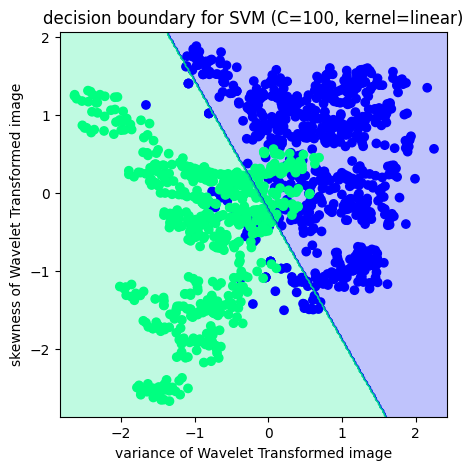

In [20]:
for C in Cs:
    svm_classifier(X, y, train_X, train_y, test_X, test_y, decision_boundary_features,
                   C=C, kernel='linear', plot=True)

test accuracy of SVM (C=0.01, kernel=poly): 0.7246376811594203


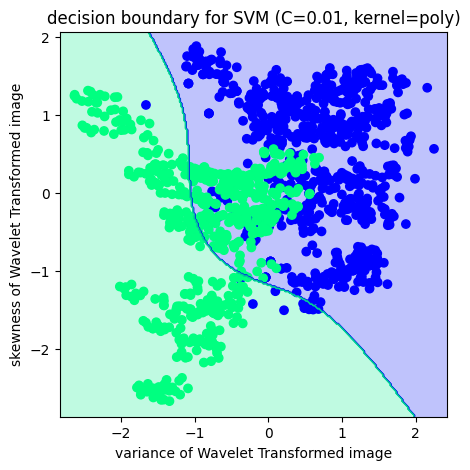

test accuracy of SVM (C=0.1, kernel=poly): 0.9384057971014492


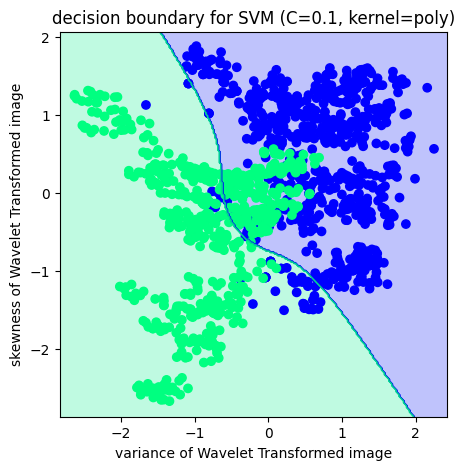

test accuracy of SVM (C=0.5, kernel=poly): 0.9818840579710145


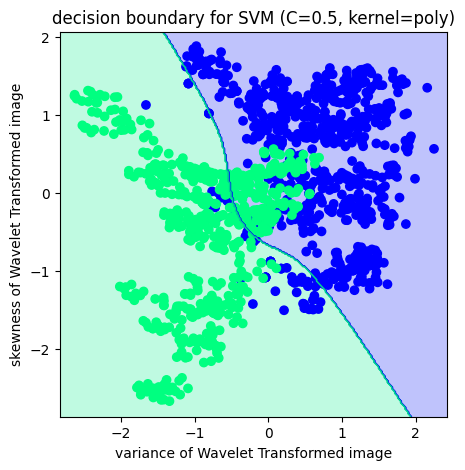

test accuracy of SVM (C=1, kernel=poly): 0.9746376811594203


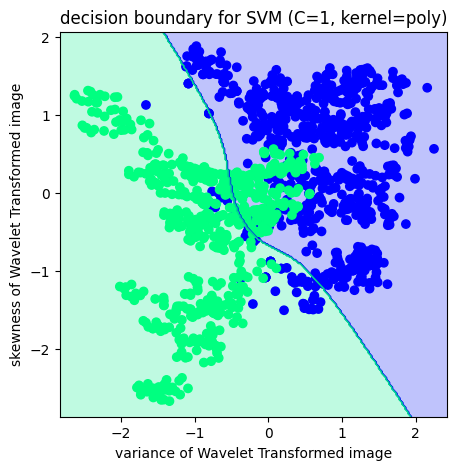

test accuracy of SVM (C=2.5, kernel=poly): 0.9782608695652174


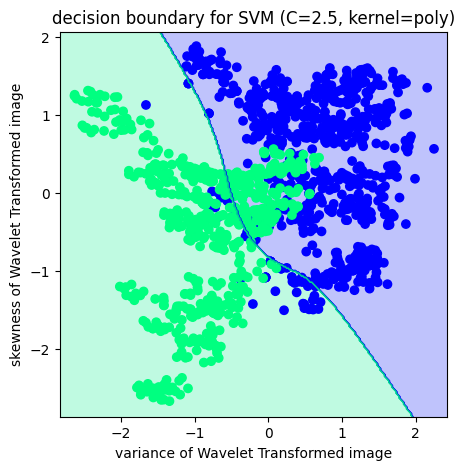

test accuracy of SVM (C=5, kernel=poly): 0.9891304347826086


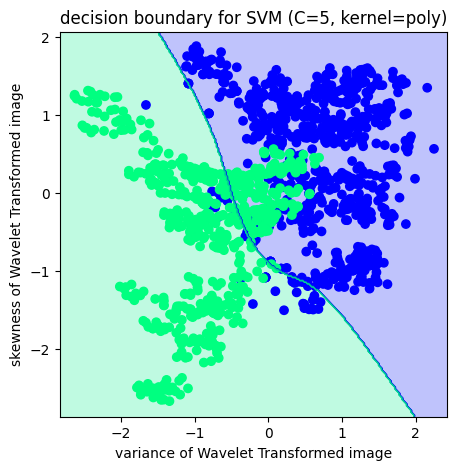

test accuracy of SVM (C=10, kernel=poly): 0.9855072463768116


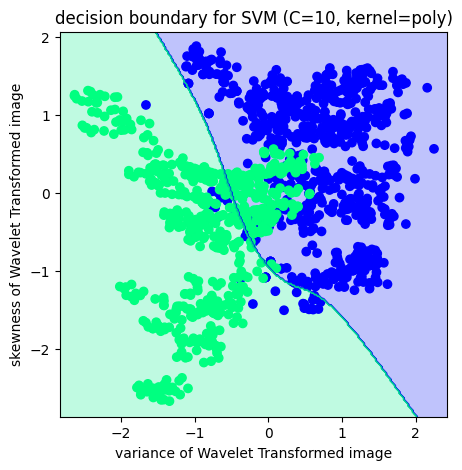

test accuracy of SVM (C=25, kernel=poly): 0.9963768115942029


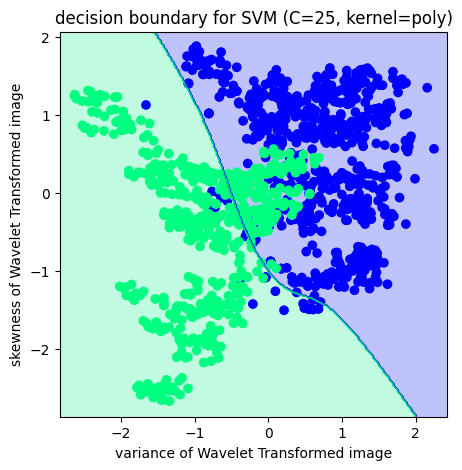

test accuracy of SVM (C=50, kernel=poly): 1.0


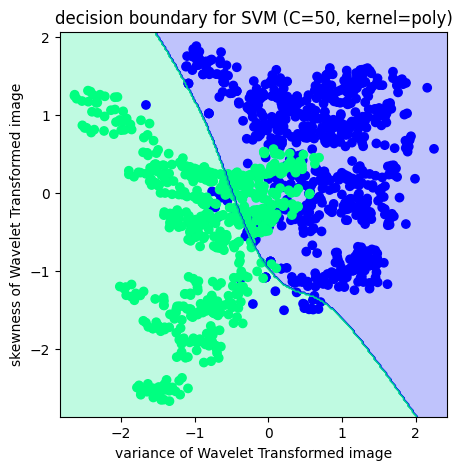

test accuracy of SVM (C=100, kernel=poly): 1.0


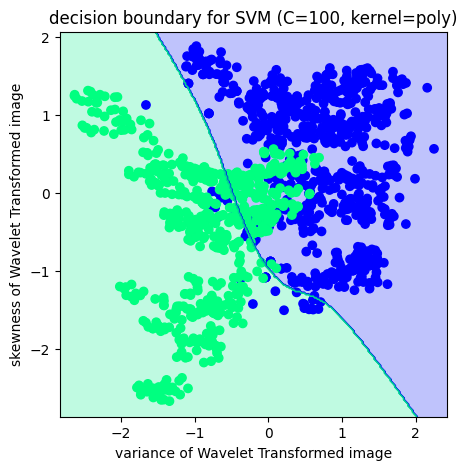

In [21]:
for C in Cs:
    svm_classifier(X, y, train_X, train_y, test_X, test_y, decision_boundary_features,
                   C=C, kernel='poly', plot=True)

test accuracy of SVM (C=0.01, kernel=rbf): 0.9130434782608695


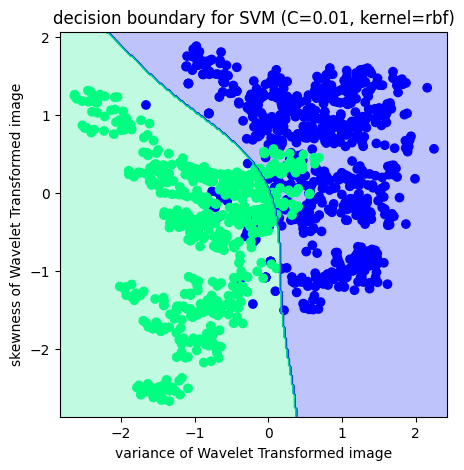

test accuracy of SVM (C=0.1, kernel=rbf): 0.9927536231884058


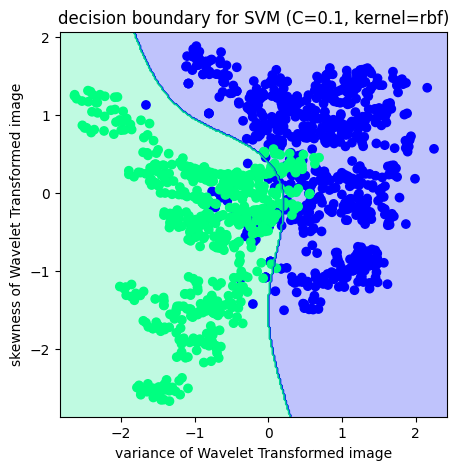

test accuracy of SVM (C=0.5, kernel=rbf): 1.0


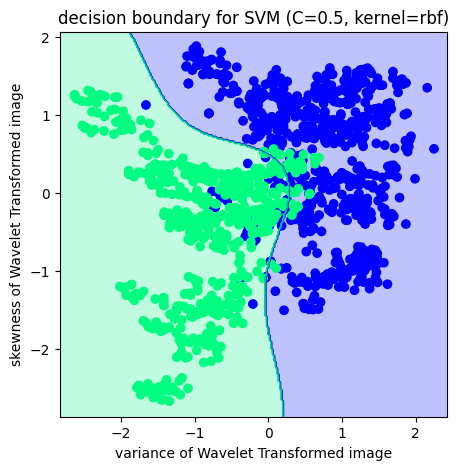

test accuracy of SVM (C=1, kernel=rbf): 1.0


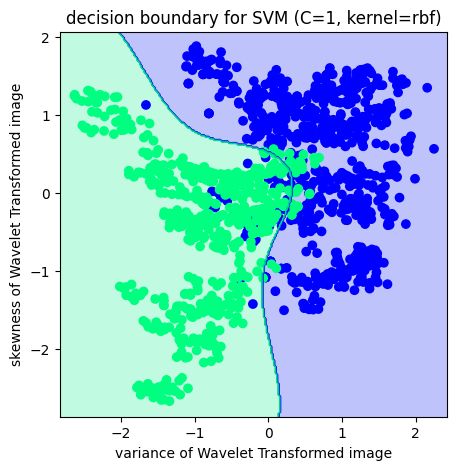

test accuracy of SVM (C=2.5, kernel=rbf): 1.0


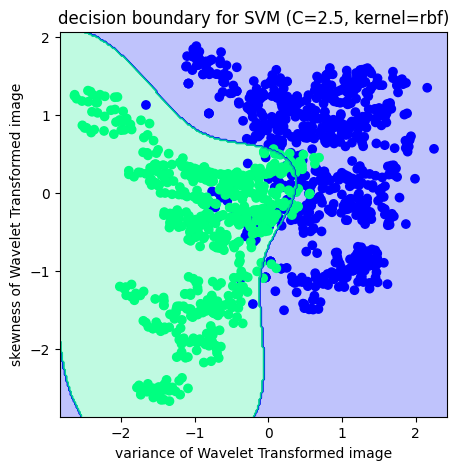

test accuracy of SVM (C=5, kernel=rbf): 1.0


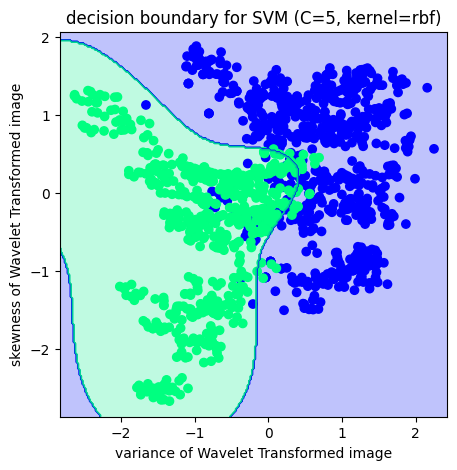

test accuracy of SVM (C=10, kernel=rbf): 1.0


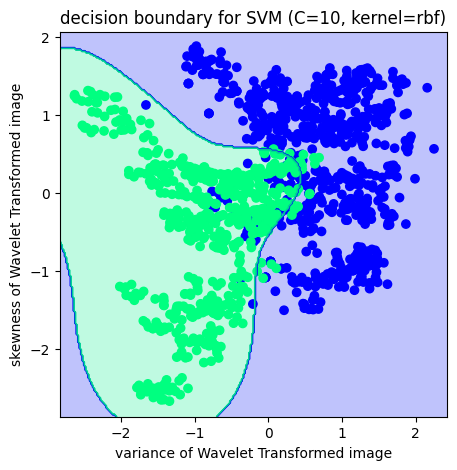

test accuracy of SVM (C=25, kernel=rbf): 1.0


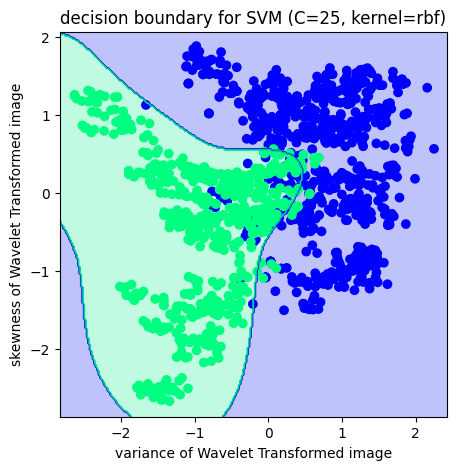

test accuracy of SVM (C=50, kernel=rbf): 1.0


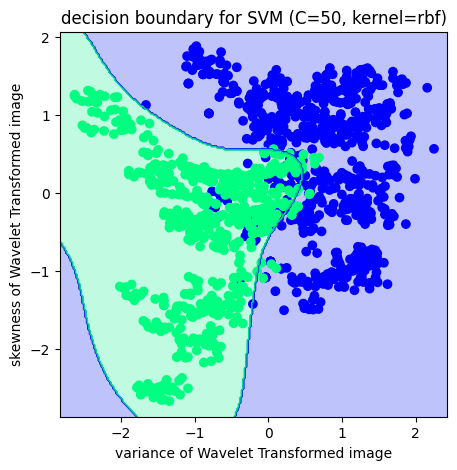

test accuracy of SVM (C=100, kernel=rbf): 1.0


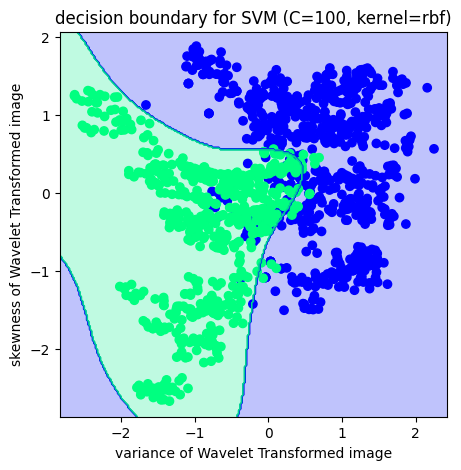

In [22]:
for C in Cs:
    svm_classifier(X, y, train_X, train_y, test_X, test_y, decision_boundary_features,
                   C=C, kernel='rbf', plot=True)

test accuracy of SVM (C=0.01, kernel=sigmoid): 0.9021739130434783


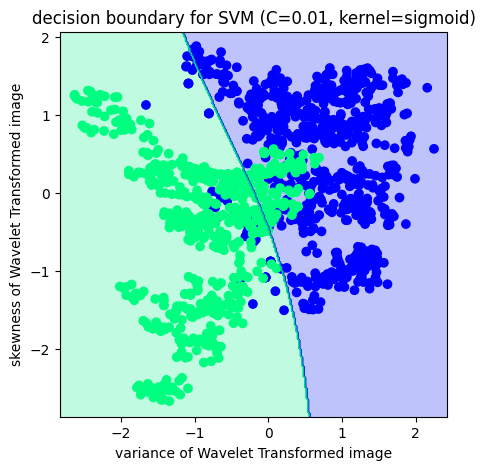

test accuracy of SVM (C=0.1, kernel=sigmoid): 0.8297101449275363


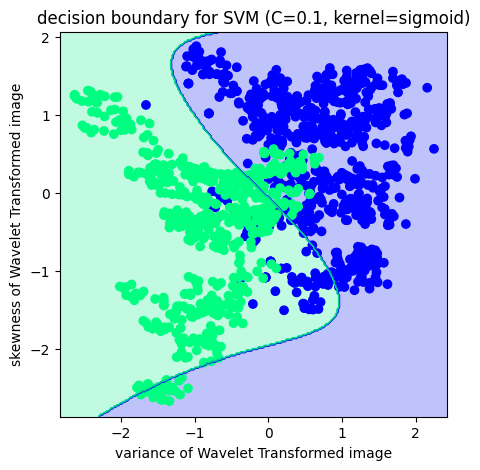

test accuracy of SVM (C=0.5, kernel=sigmoid): 0.782608695652174


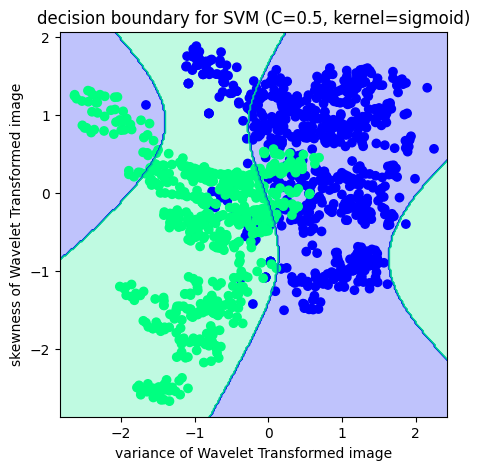

test accuracy of SVM (C=1, kernel=sigmoid): 0.7681159420289855


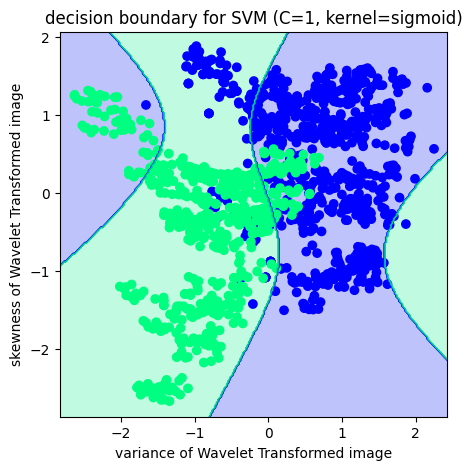

test accuracy of SVM (C=2.5, kernel=sigmoid): 0.7644927536231884


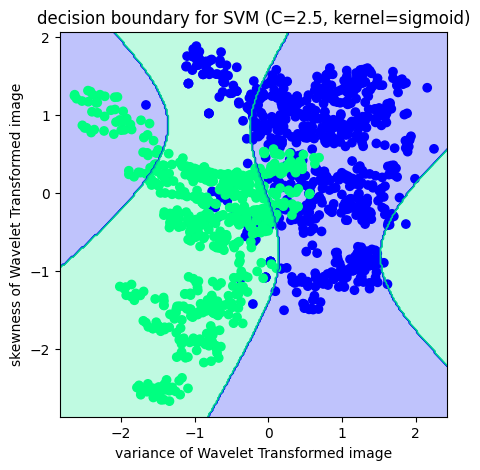

test accuracy of SVM (C=5, kernel=sigmoid): 0.7644927536231884


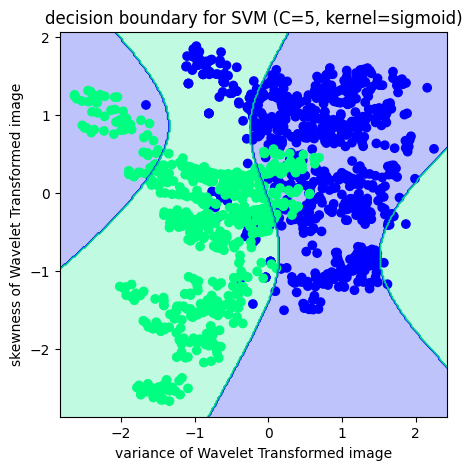

test accuracy of SVM (C=10, kernel=sigmoid): 0.7644927536231884


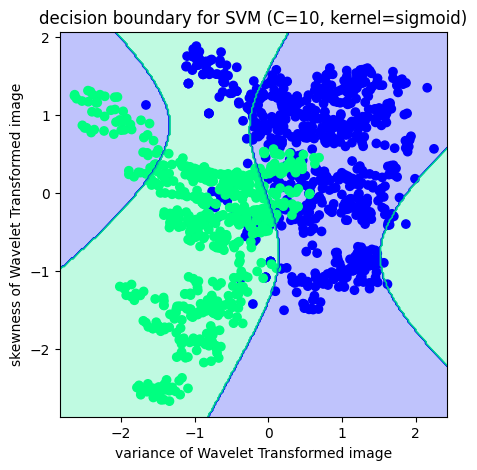

test accuracy of SVM (C=25, kernel=sigmoid): 0.7608695652173914


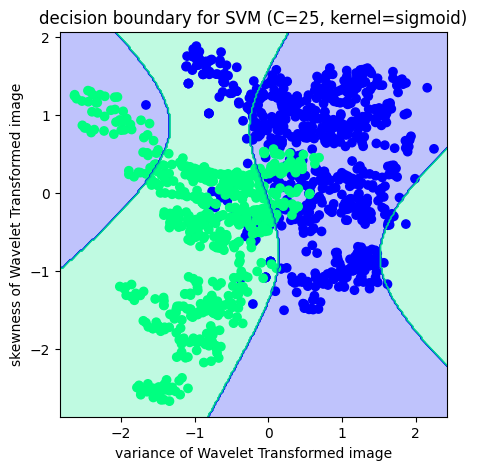

test accuracy of SVM (C=50, kernel=sigmoid): 0.7608695652173914


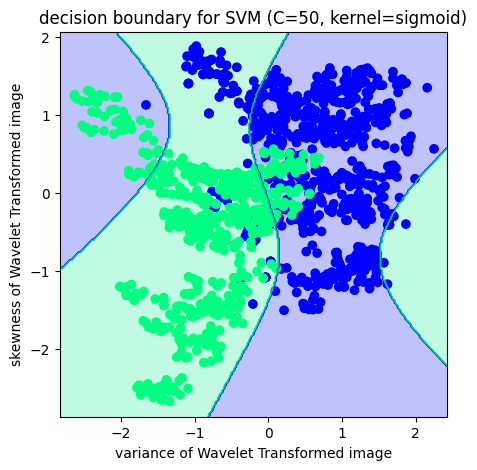

test accuracy of SVM (C=100, kernel=sigmoid): 0.7608695652173914


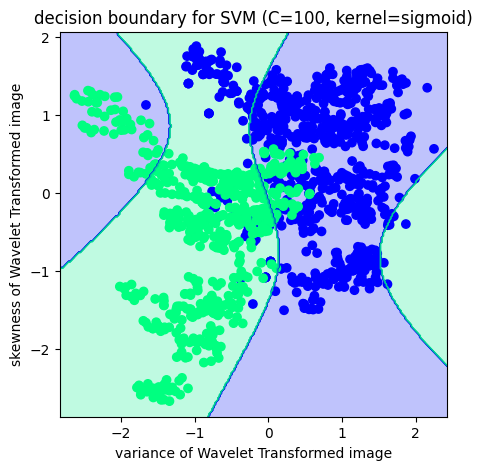

In [23]:
for C in Cs:
    svm_classifier(X, y, train_X, train_y, test_X, test_y, decision_boundary_features,
                   C=C, kernel='sigmoid', plot=True)